In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
plt.style.use('./figuras.mplstyle')


In [2]:
path = f'./Mediciones Dia 3/Barridos/'
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
print(onlyfiles)

['barrido, -1.5 a 8.0, lamda=476, ti = 1s.csv', 'barridofino_cerca_cero, -1.5 a 0.0, lamda=476, ti = 1s.csv', 'barridofino_cerca_cero, -1.5 a 1.0, lamda=476, ti = 1s.csv', 'barridofino_con_luz, -1.5 a 1.0, lamda=476, ti = 1s.csv', 'barrido_2.5V, -1.5 a 8.0, lamda=476, ti = 1s.csv', 'barrido_escaleadoAmano, -3.0 a 3.0, lamda=420, ti = 1s.csv', 'barrido_escaleadoAmano, -3.0 a 3.0, lamda=430, ti = 1s.csv', 'barrido_escaleadoAmano, -3.0 a 3.0, lamda=456, ti = 1s.csv', 'barrido_escaleadoAmano, -3.0 a 3.0, lamda=476, ti = 1s.csv', 'barrido_escaleadoAmano, -3.0 a 3.0, lamda=496, ti = 1s.csv', 'barrido_escaleadoAmano, -3.0 a 3.0, lamda=516, ti = 1s.csv', 'barrido_escaleadoAmano, -3.0 a 3.0, lamda=536, ti = 1s.csv', 'barrido_escaleadoAmano, -3.0 a 3.0, lamda=556, ti = 1s.csv', 'barrido_escaleadoAmano, -3.0 a 3.0, lamda=586, ti = 1s.csv', 'barrido_escaleadoAmano, -3.0 a 3.0, lamda=616, ti = 1s.csv']


In [ ]:
for i in range(len(onlyfiles)):
    df = pd.read_csv(join(path,onlyfiles[i]))
    print(f'Current file is {onlyfiles[i]}')
    if 'X' in df:
        V_ret = df['Potencial Retardador'].values
        x = df['X'].values
        y = df['Y'].values
        r_li = df['Corriente'].values #r medido por el lock in
        r = np.sqrt(x**2 + y**2)
        fig, ax = plt.subplots(figsize = (15,8))
        ax.scatter(V_ret,r)
        ax.set_title(f'{onlyfiles[i]}')
        ax.set_xlabel(f'Potencial Retardador [V]')
        ax.set_ylabel(f'Corriente [A]')
        fig.savefig(rf'./Figuras/Mediciones dia 3/Barrido/{onlyfiles[i]}.png',dpi = 800,bbox_inches="tight")
    else:
        V_ret = df['Potencial Retardador'].values
        r_li = df['Corriente'].values #r medido por el lock in
        fig, ax = plt.subplots(figsize = (15,8))
        ax.scatter(V_ret,r_li)
        ax.set_xlabel(f'Potencial Retardador [V]')
        ax.set_ylabel(f'Corriente [A]')
        fig.savefig(rf'./Figuras/Mediciones dia 3/Barrido/{onlyfiles[i]}.png',dpi = 800,bbox_inches="tight")

In [6]:
onlyfiles.remove('barrido_escaleadoAmano, -3.0 a 3.0, lamda=476, ti = 1s.csv')
onlyfiles.remove('barridofino_cerca_cero, -1.5 a 0.0, lamda=476, ti = 1s.csv')
onlyfiles.remove('barridofino_con_luz, -1.5 a 1.0, lamda=476, ti = 1s.csv')


Current file is barrido_escaleadoAmano, -3.0 a 3.0, lamda=420, ti = 1s.csv
Current file is barrido_escaleadoAmano, -3.0 a 3.0, lamda=430, ti = 1s.csv
Current file is barrido_escaleadoAmano, -3.0 a 3.0, lamda=456, ti = 1s.csv
Current file is barrido_escaleadoAmano, -3.0 a 3.0, lamda=496, ti = 1s.csv
Current file is barrido_escaleadoAmano, -3.0 a 3.0, lamda=516, ti = 1s.csv
Current file is barrido_escaleadoAmano, -3.0 a 3.0, lamda=536, ti = 1s.csv
Current file is barrido_escaleadoAmano, -3.0 a 3.0, lamda=556, ti = 1s.csv
Current file is barrido_escaleadoAmano, -3.0 a 3.0, lamda=586, ti = 1s.csv
Current file is barrido_escaleadoAmano, -3.0 a 3.0, lamda=616, ti = 1s.csv


(-5e-12, 5e-11)

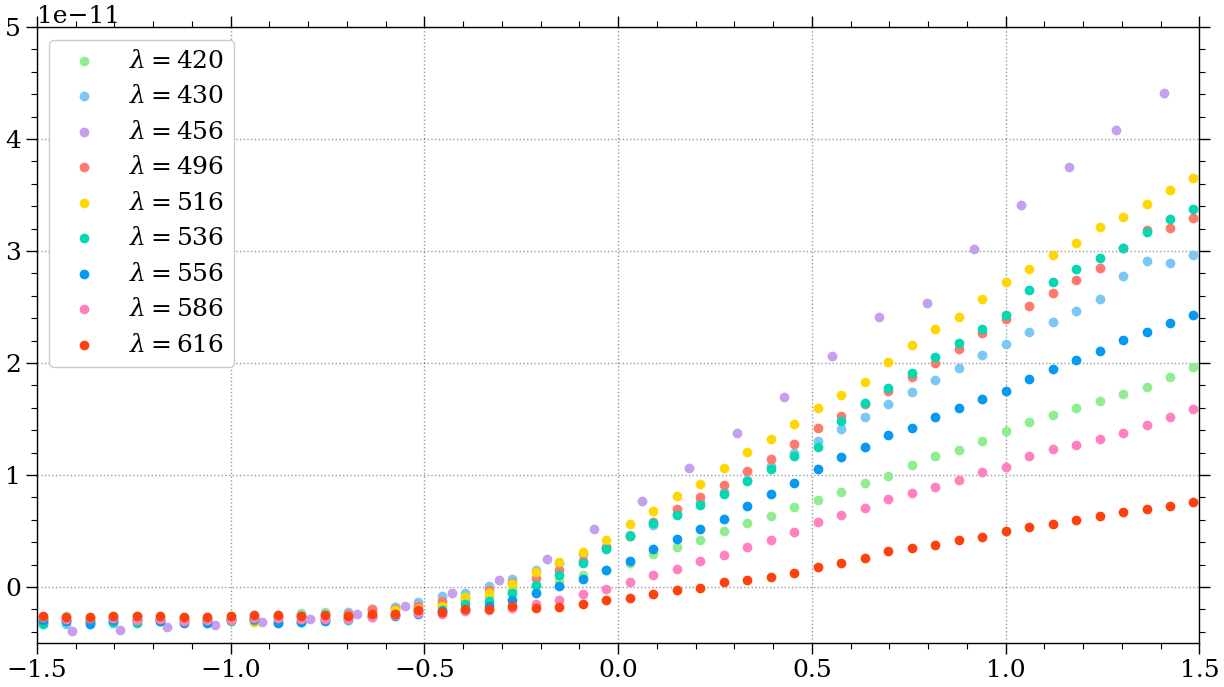

: 

In [14]:
fig, ax = plt.subplots(figsize = (15,8))
wavelenght = [420,430,456,496,516,536,556,586,616]
for i in range(len(wavelenght)):
    filename = f'barrido_escaleadoAmano, -3.0 a 3.0, lamda={wavelenght[i]}, ti = 1s.csv'
    df = pd.read_csv(join(path,filename))
    print(f'Current file is {filename}')
    if 'X' in df:
        V_ret = df['Potencial Retardador'].values
        x = df['X'].values
        y = df['Y'].values
        r_li = df['Corriente'].values #r medido por el lock in
        r = np.sqrt(x**2 + y**2)
        ax.scatter(V_ret,r)

    else:
        V_ret = df['Potencial Retardador'].values
        r_li = (-1)*df['Corriente'].values #r medido por el lock in
        ax.scatter(V_ret,r_li,label = rf'$\lambda ={wavelenght[i]}$')
ax.legend()
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-0.5e-11,5e-11)
